In [1]:
import cartopy

In [2]:
import xarray as xr
import sys
sys.path.insert(0,"/Users/auraoupa/lib/python")

import numpy as np
sys.path.insert(0,"/Users/auraoupa/Work/git/xscale")
import xscale
import xscale.spectral.fft as xfft
from matplotlib.colors import LogNorm
import cmocean
import matplotlib.pylab as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

sys.path.insert(0,"/Users/auraoupa/lib/python/w_k_scripts")
import Wavenum_freq_spec_func as wfs

In [3]:
gridfile="/Users/auraoupa/Data/eNATL60/eNATL60-I/mesh_mask_eNATL60_3.6.nc"
dsgrid=xr.open_mfdataset(gridfile)
ff=dsgrid['ff']

In [30]:
fUtide = xr.open_mfdataset(tfilesUtide,chunks={'time_counter':744,'x':500,'y':500})
Utide=fUtide['sozocrtx'][:]
navlat= fUtide['nav_lat']
navlon= fUtide['nav_lon']

fUnotide = xr.open_mfdataset(tfilesUnotide)
Unotide=fUnotide['sozocrtx'][:]

fVtide = xr.open_mfdataset(tfilesVtide)
Vtide=fVtide['somecrty'][:]

fVnotide = xr.open_mfdataset(tfilesVnotide)
Vnotide=fVnotide['somecrty'][:]


In [29]:
Utide

<xarray.DataArray 'sozocrtx' (time_counter: 744, y: 1191, x: 781)>
dask.array<shape=(744, 1191, 781), dtype=float32, chunksize=(24, 500, 500)>
Coordinates:
    nav_lat        (y, x) float32 23.174568 23.174568 ... 40.094227 40.094173
    nav_lon        (y, x) float32 -37.391693 -37.375027 ... -24.363064
    time_centered  (time_counter) datetime64[ns] dask.array<shape=(744,), chunksize=(24,)>
  * time_counter   (time_counter) datetime64[ns] 2009-07-10T00:30:00 ... 2009-08-09T23:30:00
Dimensions without coordinates: y, x
Attributes:
    long_name:           ocean surface current along i-axis
    units:               m/s
    online_operation:    average
    interval_operation:  40 s
    interval_write:      1 h
    cell_methods:        time: mean (interval: 40 s)

In [16]:
T=2*np.pi/(1E-4)

In [17]:
print T

62831.8530718


In [18]:
wutide=Utide.window
wutide.set(n=30,dim='time_counter', cutoff=T)
Utidefilt=wutide.convolve()

In [19]:
box=(-31,-28,33,36)
domain=(box[0]<navlon)*(navlon<box[1])*(box[2]<navlat)*(navlat<box[3])
where=np.where(domain)

lats=navlat[where]
lons=navlon[where]


In [20]:

ind = np.unravel_index(np.argmin(lats, axis=None), lats.shape)
jmin = where[0][ind[0]]
ind = np.unravel_index(np.argmax(lats, axis=None), lats.shape)
jmax = where[0][ind[0]]
ind = np.unravel_index(np.argmin(lons, axis=None), lons.shape)
imin = where[1][ind[1]]
ind = np.unravel_index(np.argmax(lons, axis=None), lons.shape)
imax = where[1][ind[1]]


In [21]:
ii=(imin+imax)/2
jj=(jmin+jmax)/2

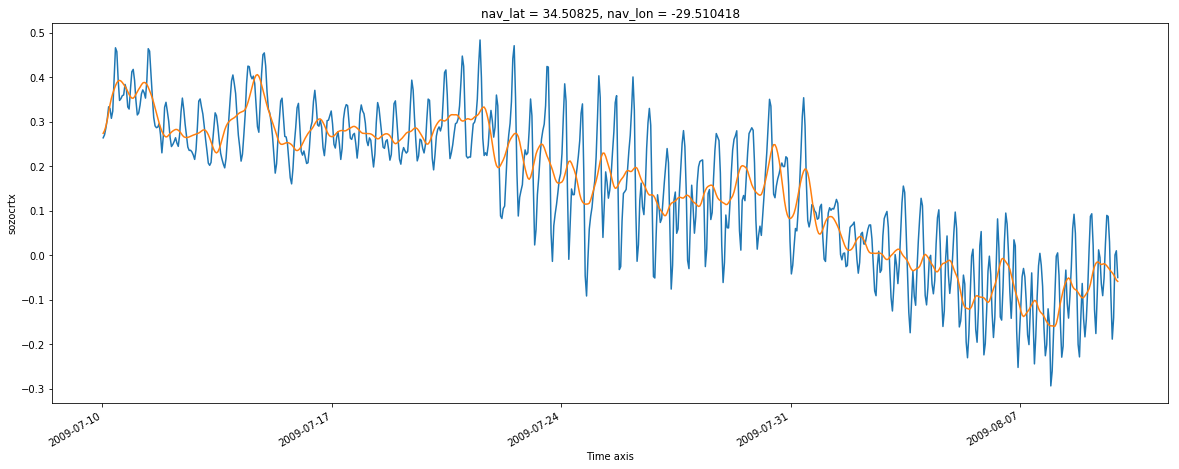

In [23]:
fig=plt.figure(figsize=(20,7))
Utide.isel(y=jj, x=ii).plot()
Utidefilt.isel(y=jj, x=ii).plot(label='filt')